In [25]:
import pandas as pd
# Specify the download links from Google Drive
merged_dataset = 'https://drive.google.com/uc?id=1IOYlAO7P4Ca3nn1Xj2uIR1xyYeQTuwjf'

# Load the datasets directly from the links
dataset_df = pd.read_csv(merged_dataset)

In [ ]:
dataset_df.loc[dataset_df['state'] == 'Completed']

#print(dataset_df.to_string())

,id,order_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,category,created_date,total_paid,state,short,long
7,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,49.99,1.0,12755395.0,Cables & Adapters,2017-01-01 01:51:47,51.48,Completed,OWC,OWC
8,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,16.99,0.0,5720.0,Supports & Stands,2017-01-01 01:57:34,18.99,Completed,IOT,IOT
9,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,64.99,1.0,13005399.0,Chargers & Charging Docks,2017-01-01 02:02:38,72.19,Completed,APP,APP
11,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,2667.99,0.0,1282.0,MacBooks & iMACs,2017-01-02 10:00:20,2565.99,Completed,PAC,PAC
18,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,70.70,0.0,1298.0,Refurbished & Used Products,2017-01-01 02:30:08,65.89,Completed,CRU,CRU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293599,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,19.99,0.0,13835403.0,Protectors & Covers,2018-03-14 11:56:19,85.73,Completed,TUC,TUC
293616,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,9.99,1.0,1230.0,Cables & Adapters,2018-03-14 11:50:48,24.97,Completed,APP,APP
293621,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,9.99,1.0,1230.0,Cables & Adapters,2018-03-14 11:51:42,24.97,Completed,APP,APP
293644,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,9.99,1.0,1230.0,Cables & Adapters,2018-03-14 11:58:40,34.96,Completed,APP,APP


<ipython-input-28-1d1c3c2aa00d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['revenue'] = dataset_df['price'] * dataset_df['product_quantity']
<ipython-input-28-1d1c3c2aa00d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=revenue_by_category, x='category', y='revenue', palette='viridis', width=0.7)


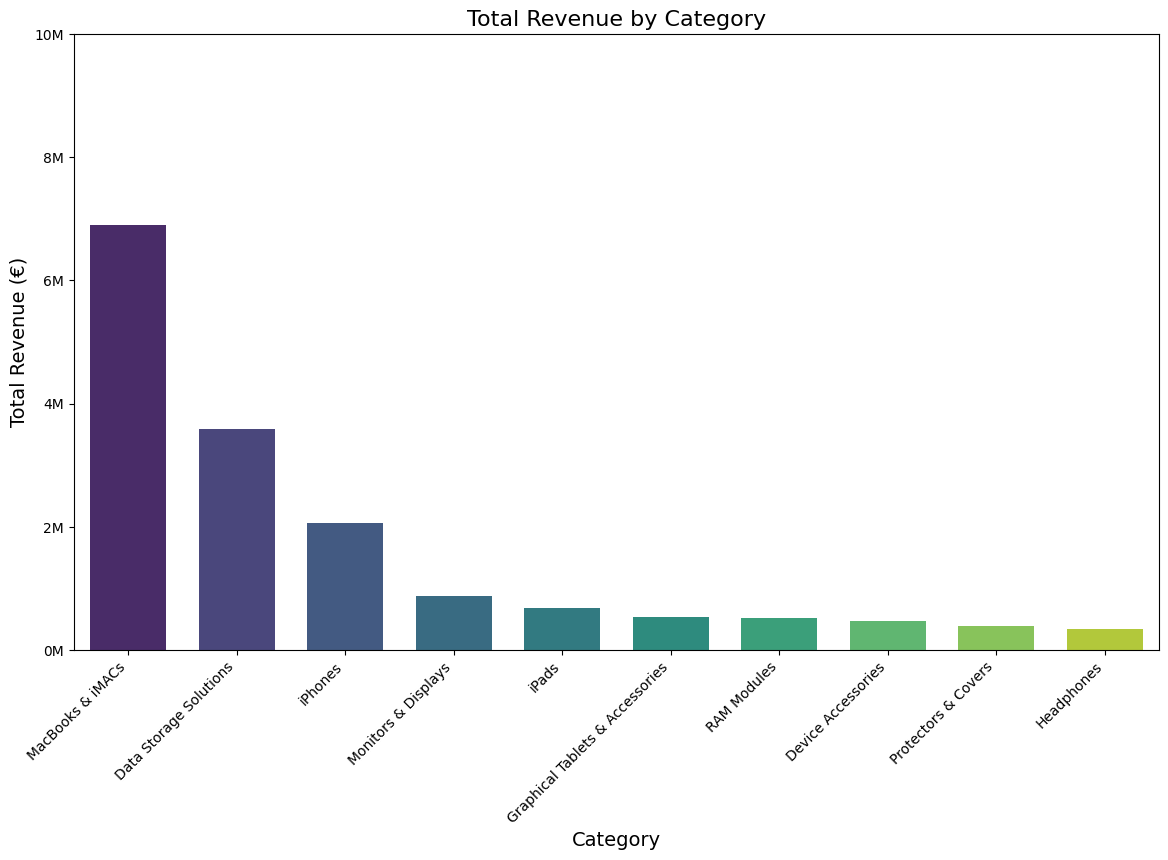

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Ensure only completed orders are considered
dataset_df = dataset_df[dataset_df['state'] == 'Completed']

# Calculate revenue per product
dataset_df['revenue'] = dataset_df['price'] * dataset_df['product_quantity']

# Get the top 10 revenue-generating categories
revenue_by_category = dataset_df.groupby('category')['revenue'].sum().nlargest(10).reset_index()

# Set figure size and bar width
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=revenue_by_category, x='category', y='revenue', palette='viridis', width=0.7)

# Customize labels and title
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Revenue (€)', fontsize=14)
plt.title('Total Revenue by Category', fontsize=16)

# Format the y-axis to show values in millions (M)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Set y-axis limit to 10 million
plt.ylim(0, 10e6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
pd.to_datetime(dataset_df['date'])

,date
7,2017-01-01 01:46:16
8,2017-01-01 01:50:34
9,2017-01-01 01:54:11
11,2017-01-01 02:07:42
18,2017-01-01 02:20:14
...,...
293599,2018-03-14 11:45:05
293616,2018-03-14 11:49:01
293621,2018-03-14 11:49:36
293644,2018-03-14 11:54:35


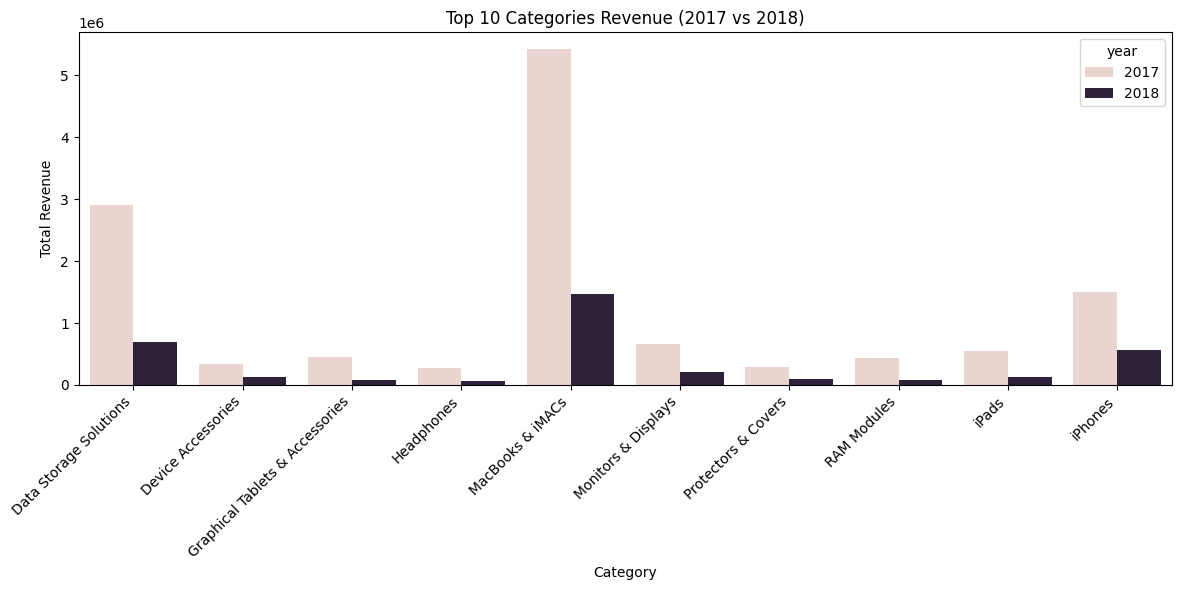

In [7]:
# Convert 'order_date' to datetime objects
dataset_df['created_date'] = pd.to_datetime(dataset_df['date'])
dataset_df['date'] = pd.to_datetime(dataset_df['date'])

# Extract year from 'order_date'
dataset_df['year'] = dataset_df['date'].dt.year

# Filter data for 2017 and 2018
df_2017_2018 = dataset_df[(dataset_df['year'] == 2017) | (dataset_df['year'] == 2018)]

# Group by category and year, sum revenue
revenue_by_category_year = df_2017_2018.groupby(['category', 'year'])['revenue'].sum().reset_index()

# Get the top 10 categories by total revenue across both years
top_10_categories = revenue_by_category_year.groupby('category')['revenue'].sum().nlargest(10).index

# Filter data for the top 10 categories
top_10_revenue = revenue_by_category_year[revenue_by_category_year['category'].isin(top_10_categories)]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='revenue', hue='year', data=top_10_revenue)
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Top 10 Categories Revenue (2017 vs 2018)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-11-585d9c5fd018>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='revenue', y='category', palette='viridis')


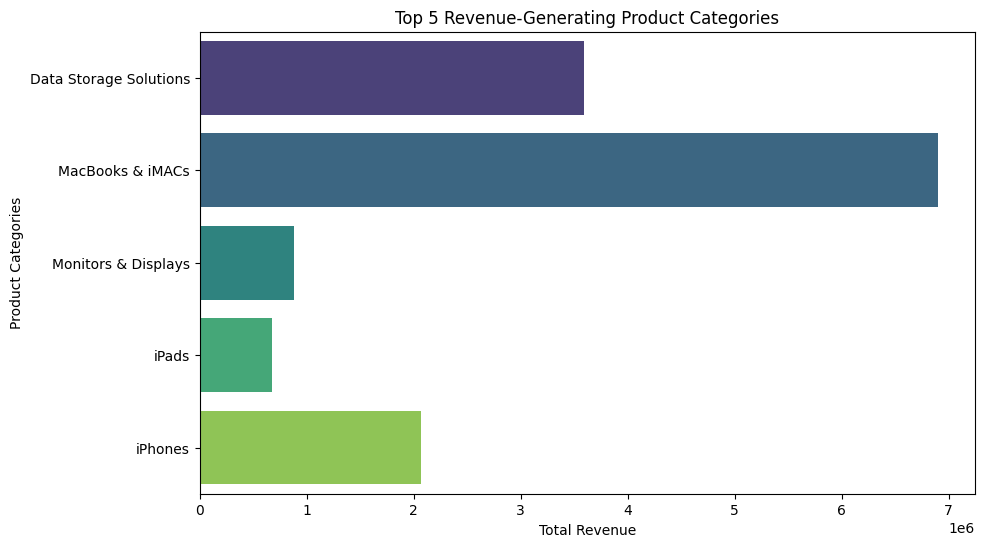

<ipython-input-11-585d9c5fd018>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_discounts, x='discount', y='category', palette='coolwarm')


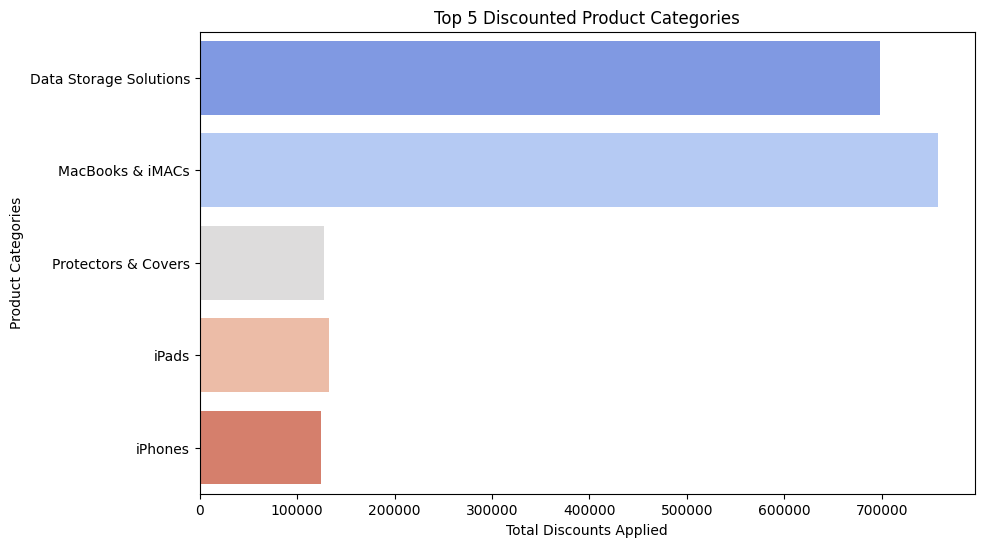

<ipython-input-11-585d9c5fd018>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_quantity, x='product_quantity', y='category', palette='Blues')


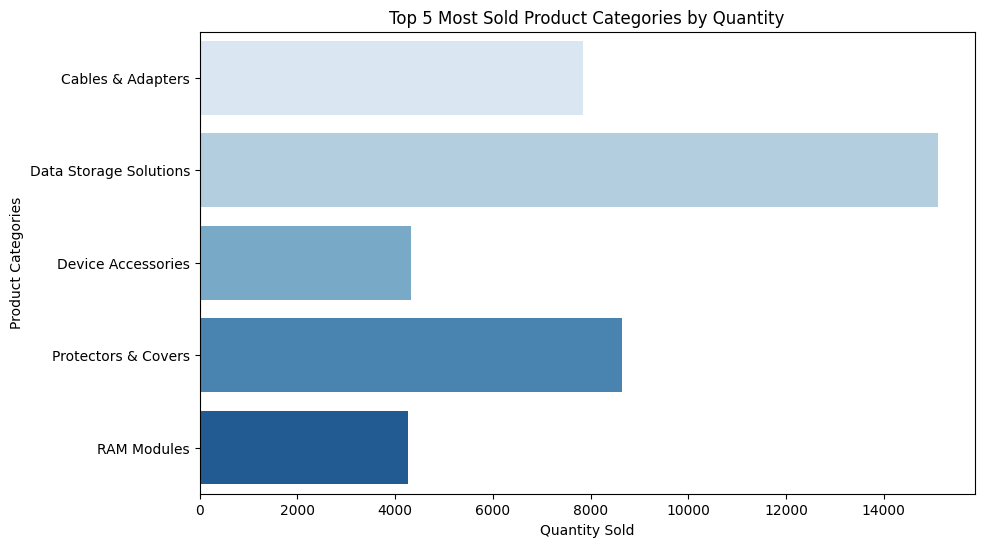

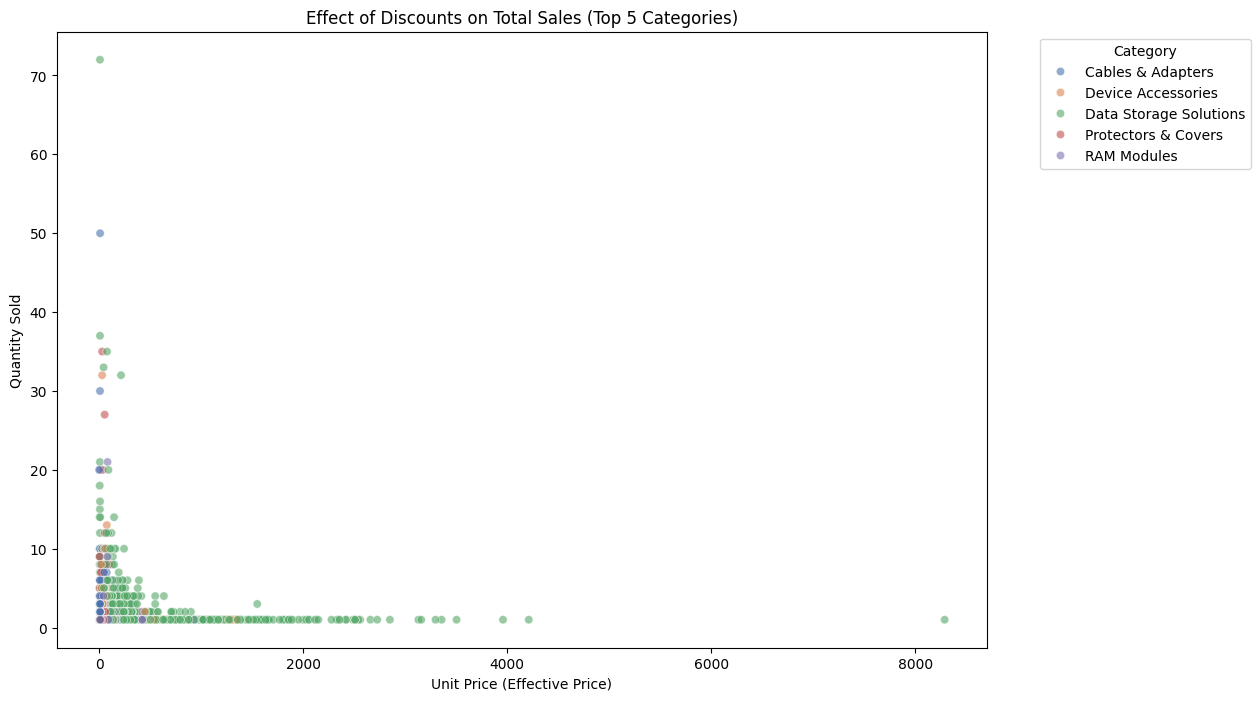

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset_df' is the DataFrame containing the necessary data
# Ensure correct column names before running the script

# 1. Revenue Breakdown by Product Categories (Top 5)
top_5_categories = dataset_df.groupby('category')['revenue'].sum().nlargest(5).index
category_revenue = dataset_df[dataset_df['category'].isin(top_5_categories)].groupby('category')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x='revenue', y='category', palette='viridis')
plt.title('Top 5 Revenue-Generating Product Categories')
plt.xlabel('Total Revenue')
plt.ylabel('Product Categories')
plt.show()

# 2. Discounts Applied by Product Category (Top 5)
dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']
top_5_discount_categories = dataset_df.groupby('category')['discount'].sum().nlargest(5).index
category_discounts = dataset_df[dataset_df['category'].isin(top_5_discount_categories)].groupby('category')['discount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_discounts, x='discount', y='category', palette='coolwarm')
plt.title('Top 5 Discounted Product Categories')
plt.xlabel('Total Discounts Applied (€)')
plt.ylabel('Product Categories')
plt.show()

# 3. Most Sold Categories by Quantity (Top 5)
top_5_quantity_categories = dataset_df.groupby('category')['product_quantity'].sum().nlargest(5).index
category_quantity = dataset_df[dataset_df['category'].isin(top_5_quantity_categories)].groupby('category')['product_quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_quantity, x='product_quantity', y='category', palette='Blues')
plt.title('Top 5 Most Sold Product Categories by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Categories')
plt.show()

# 4. Effect of Discounts on Total Sales by Product Category (Scatterplot - Top 5)
dataset_df['price_per_item'] = dataset_df['unit_price']
top_5_scatter_categories = dataset_df.groupby('category')['product_quantity'].sum().nlargest(5).index
filtered_df = dataset_df[dataset_df['category'].isin(top_5_scatter_categories)]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='unit_price', y='product_quantity', hue='category', palette='deep', alpha=0.6)
plt.title('Effect of Discounts on Total Sales (Top 5 Categories)')
plt.xlabel('Unit Price (Effective Price)')
plt.ylabel('Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-20-7bc43bf229a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['discount_status'] = dataset_df['total_paid'] < dataset_df['price']


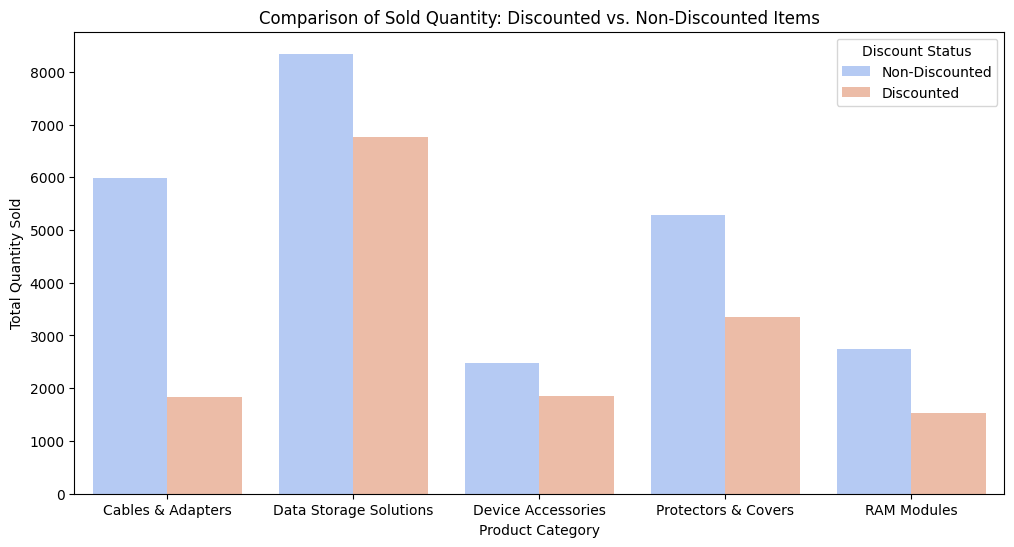

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define discounted vs. non-discounted items
dataset_df['discount_status'] = dataset_df['total_paid'] < dataset_df['price']

# Group data by category and discount status
quantity_comparison = (
    dataset_df.groupby(['category', 'discount_status'])['product_quantity']
    .sum()
    .reset_index()
)

# Rename for clarity
quantity_comparison['discount_status'] = quantity_comparison['discount_status'].map(
    {True: 'Discounted', False: 'Non-Discounted'}
)

# Select top 5 categories by total quantity sold
top_5_categories = dataset_df.groupby('category')['product_quantity'].sum().nlargest(5).index
quantity_comparison = quantity_comparison[quantity_comparison['category'].isin(top_5_categories)]

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=quantity_comparison, x='category', y='product_quantity', hue='discount_status', palette='coolwarm')

plt.title('Comparison of Sold Quantity: Discounted vs. Non-Discounted Items')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Discount Status')
plt.show()

<ipython-input-21-d06cd7616cdb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['is_discounted'] = dataset_df['unit_price'] < dataset_df['price']
<ipython-input-21-d06cd7616cdb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_counts, x='Discounted', y='Total Orders', palette=['#FF5733', '#3498db'])


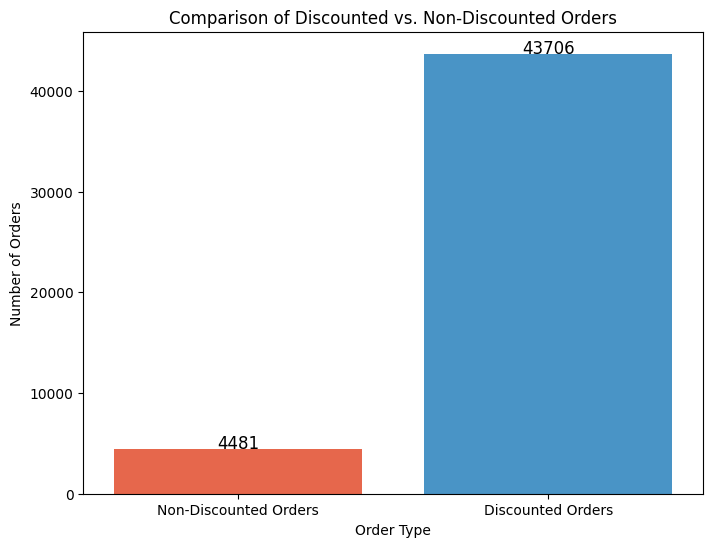

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column to classify orders as Discounted or Non-Discounted
dataset_df['is_discounted'] = dataset_df['unit_price'] < dataset_df['price']

# Count the number of unique orders in each category
order_counts = dataset_df.groupby('is_discounted')['order_id'].nunique().reset_index()

# Rename columns for clarity
order_counts.columns = ['Discounted', 'Total Orders']
order_counts['Discounted'] = order_counts['Discounted'].map({True: 'Discounted Orders', False: 'Non-Discounted Orders'})

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=order_counts, x='Discounted', y='Total Orders', palette=['#FF5733', '#3498db'])

# Titles and labels
plt.title('Comparison of Discounted vs. Non-Discounted Orders')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')

# Display the values on top of bars
for index, value in enumerate(order_counts['Total Orders']):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)

plt.show()

<ipython-input-22-68890e48b7f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['is_discounted'] = dataset_df['unit_price'] < dataset_df['price']


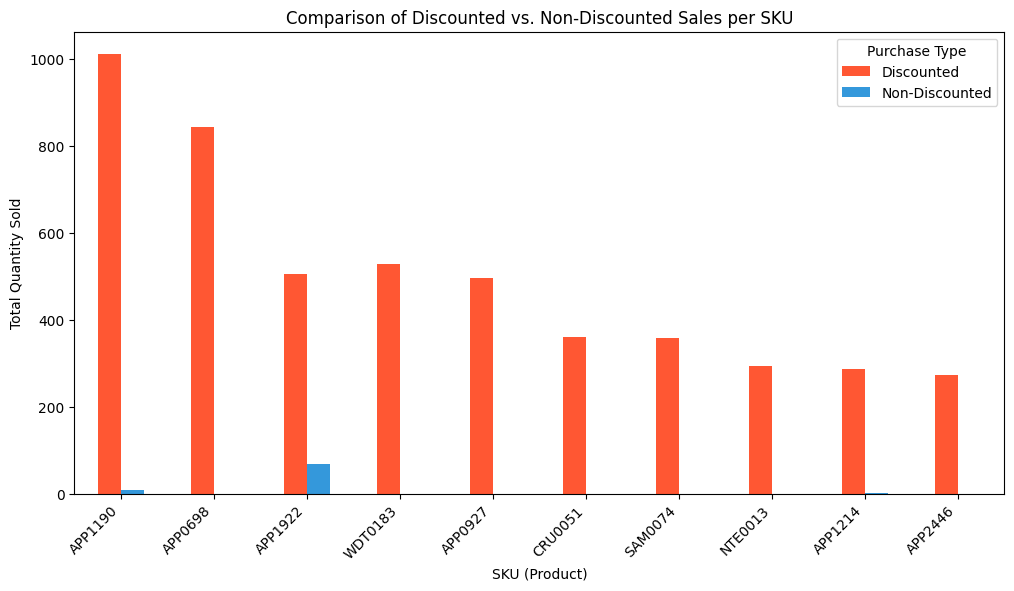

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column to classify whether an item was sold at a discount
dataset_df['is_discounted'] = dataset_df['unit_price'] < dataset_df['price']

# Group by SKU and discount status, summing up the quantity sold
sku_sales = dataset_df.groupby(['sku', 'is_discounted'])['product_quantity'].sum().reset_index()

# Convert the boolean column to readable labels
sku_sales['is_discounted'] = sku_sales['is_discounted'].map({True: 'Discounted', False: 'Non-Discounted'})

# Pivot the data for easier plotting
sku_sales_pivot = sku_sales.pivot(index='sku', columns='is_discounted', values='product_quantity').fillna(0)

# Select the top SKUs by total quantity sold
top_skus = sku_sales_pivot.sum(axis=1).nlargest(10).index
sku_sales_pivot = sku_sales_pivot.loc[top_skus]

# Plot the data
sku_sales_pivot.plot(kind='bar', figsize=(12, 6), color=['#FF5733', '#3498db'])

# Titles and labels
plt.title('Comparison of Discounted vs. Non-Discounted Sales per SKU')
plt.xlabel('SKU (Product)')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Purchase Type')
plt.xticks(rotation=45, ha='right')

plt.show()

<ipython-input-23-fb668d86e0d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['is_discounted'] = dataset_df['unit_price'] < dataset_df['price']


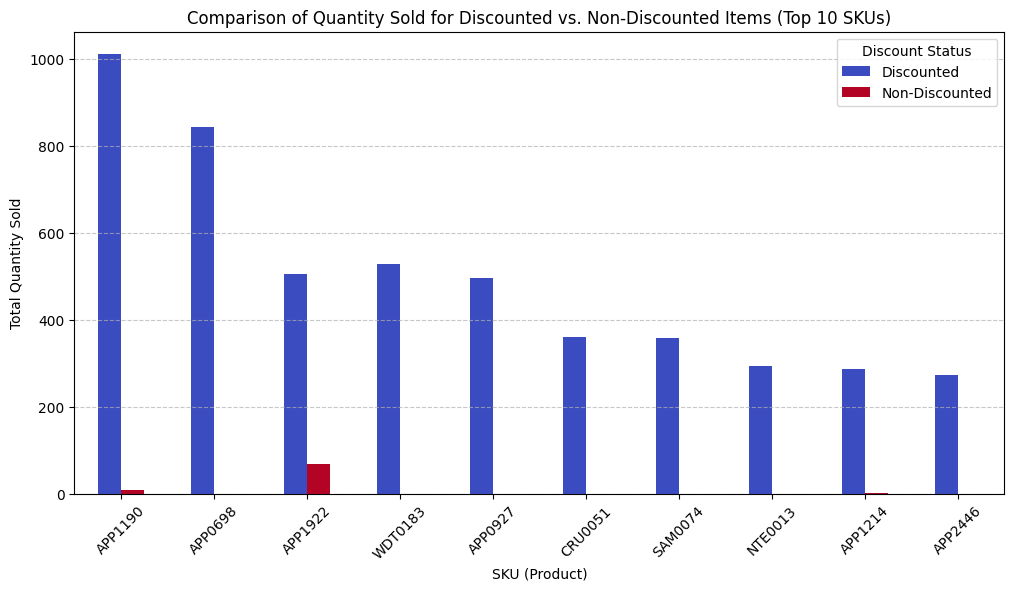

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column to classify items as Discounted or Non-Discounted
dataset_df['is_discounted'] = dataset_df['unit_price'] < dataset_df['price']

# Aggregate quantity sold for each SKU based on whether it was discounted or not
sku_sales = dataset_df.groupby(['sku', 'is_discounted'])['product_quantity'].sum().reset_index()

# Rename the 'is_discounted' column for better readability
sku_sales['is_discounted'] = sku_sales['is_discounted'].map({True: 'Discounted', False: 'Non-Discounted'})

# Pivot the data to make it easier to compare
sku_pivot = sku_sales.pivot(index='sku', columns='is_discounted', values='product_quantity').fillna(0)

# Sort by total sales for better visualization
sku_pivot['Total Sales'] = sku_pivot.sum(axis=1)
sku_pivot = sku_pivot.sort_values(by='Total Sales', ascending=False).drop(columns=['Total Sales'])

# Select the top 10 SKUs for a cleaner visualization
top_skus = sku_pivot.head(10)

# Plot the data
top_skus.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')

# Titles and labels
plt.title('Comparison of Quantity Sold for Discounted vs. Non-Discounted Items (Top 10 SKUs)')
plt.xlabel('SKU (Product)')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Discount Status')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-24-f051a645cd83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['is_discounted'] = dataset_df['unit_price'] < dataset_df['price']


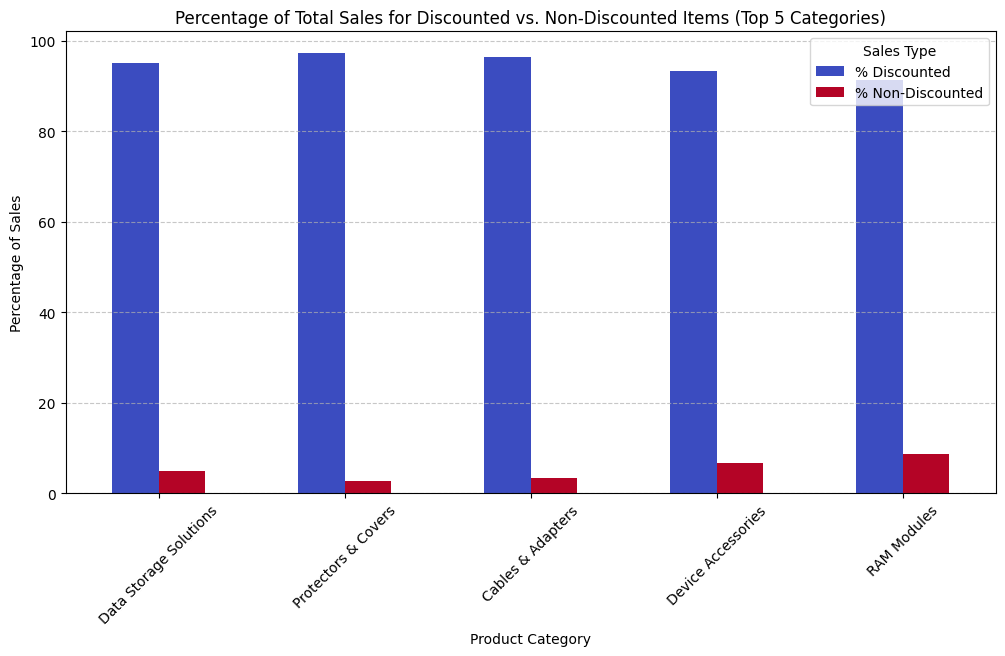

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column indicating whether the item was sold at a discount
dataset_df['is_discounted'] = dataset_df['unit_price'] < dataset_df['price']

# Aggregate total quantity sold per category, separated by discount status
category_sales = dataset_df.groupby(['category', 'is_discounted'])['product_quantity'].sum().reset_index()

# Convert boolean values to readable labels
category_sales['is_discounted'] = category_sales['is_discounted'].map({True: 'Discounted', False: 'Non-Discounted'})

# Pivot the data to compare quantities side by side
category_pivot = category_sales.pivot(index='category', columns='is_discounted', values='product_quantity').fillna(0)

# Calculate percentage of sales per category for each discount status
category_pivot['Total Sales'] = category_pivot.sum(axis=1)
category_pivot['% Discounted'] = (category_pivot['Discounted'] / category_pivot['Total Sales']) * 100
category_pivot['% Non-Discounted'] = (category_pivot['Non-Discounted'] / category_pivot['Total Sales']) * 100

# Sort by total sales and select the top 5 categories
top_categories = category_pivot.sort_values(by='Total Sales', ascending=False).head(5)

# Plot the percentage comparison
top_categories[['% Discounted', '% Non-Discounted']].plot(kind='bar', figsize=(12, 6), colormap='coolwarm')

# Titles and labels
plt.title('Percentage of Total Sales for Discounted vs. Non-Discounted Items (Top 5 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Percentage of Sales')
plt.legend(title='Sales Type')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-12-141de2aa3cbe>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='category', y='total_revenue', palette='viridis', ax=ax1)


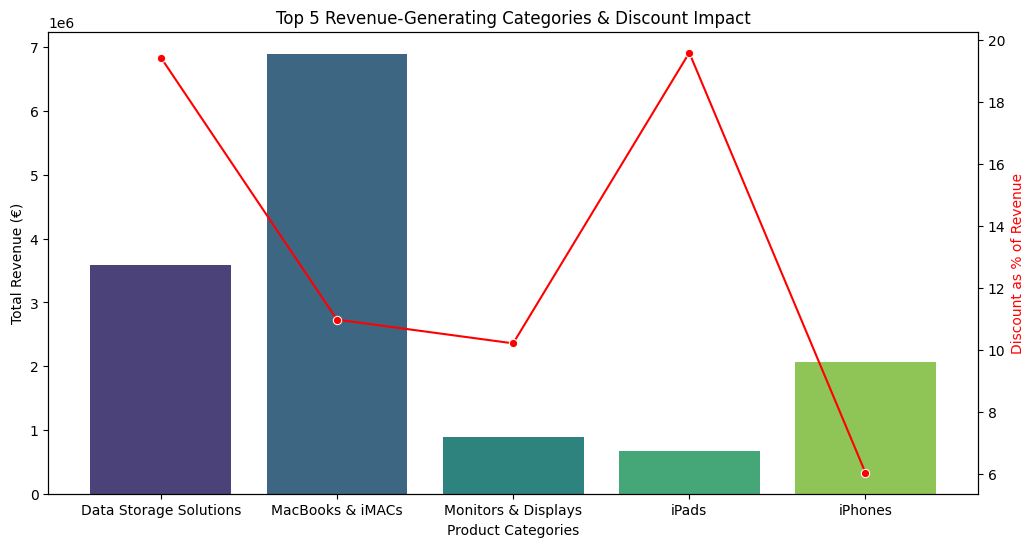

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'discount' column is calculated
dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']

# Get top 5 revenue-generating categories
top_5_categories = dataset_df.groupby('category')['revenue'].sum().nlargest(5).index

# Filter dataset for these categories
category_data = dataset_df[dataset_df['category'].isin(top_5_categories)]

# Aggregate revenue and discount values
category_summary = category_data.groupby('category').agg(
    total_revenue=('revenue', 'sum'),
    total_discount=('discount', 'sum')
).reset_index()

# Calculate discount as a percentage of revenue
category_summary['discount_percentage'] = (category_summary['total_discount'] / category_summary['total_revenue']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for revenue
sns.barplot(data=category_summary, x='category', y='total_revenue', palette='viridis', ax=ax1)
ax1.set_ylabel('Total Revenue (€)', color='black')
ax1.set_xlabel('Product Categories')
ax1.set_title('Top 5 Revenue-Generating Categories & Discount Impact')

# Create a second y-axis for discount percentage
ax2 = ax1.twinx()
sns.lineplot(data=category_summary, x='category', y='discount_percentage', marker='o', color='red', ax=ax2)
ax2.set_ylabel('Discount as % of Revenue', color='red')

# Display the plot
plt.show()

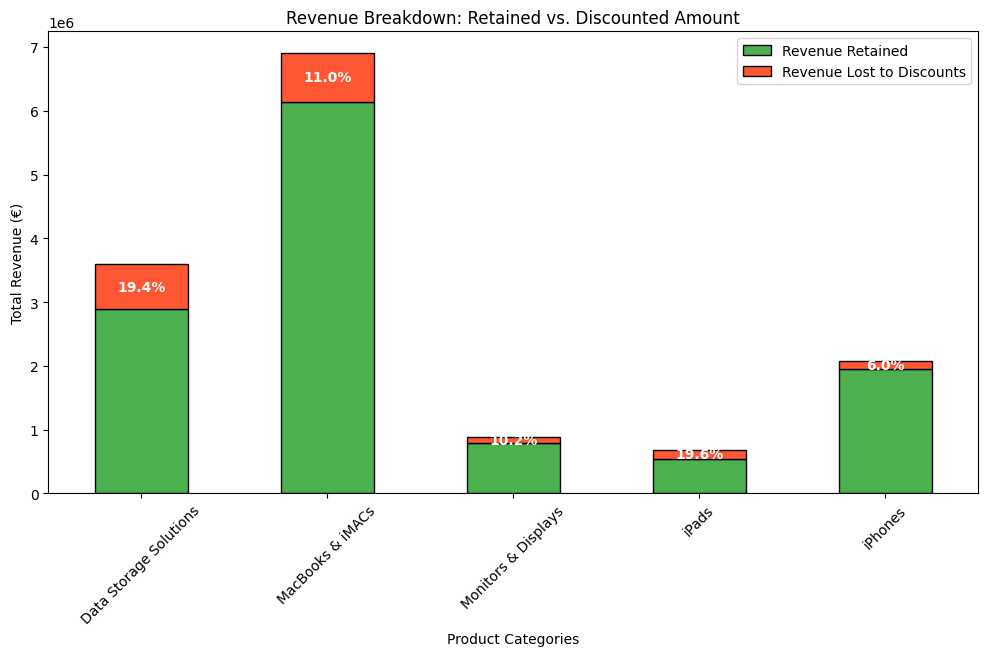

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'discount' column is calculated
dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']

# Get top 5 revenue-generating categories
top_5_categories = dataset_df.groupby('category')['revenue'].sum().nlargest(5).index

# Filter dataset for these categories
category_data = dataset_df[dataset_df['category'].isin(top_5_categories)]

# Aggregate revenue and discount values
category_summary = category_data.groupby('category').agg(
    total_revenue=('revenue', 'sum'),
    total_discount=('discount', 'sum')
).reset_index()

# Calculate the remaining revenue after discounts
category_summary['revenue_after_discount'] = category_summary['total_revenue'] - category_summary['total_discount']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar plot
category_summary.set_index('category')[['revenue_after_discount', 'total_discount']].plot(
    kind='bar', stacked=True, color=['#4CAF50', '#FF5733'], edgecolor='black', ax=ax
)

# Labels and Title
plt.ylabel('Total Revenue (€)')
plt.xlabel('Product Categories')
plt.title('Revenue Breakdown: Retained vs. Discounted Amount')
plt.legend(['Revenue Retained', 'Revenue Lost to Discounts'])
plt.xticks(rotation=45)

# Show percentages on bars
for idx, row in enumerate(category_summary.itertuples()):
    total = row.total_revenue
    discount_pct = (row.total_discount / total) * 100
    ax.text(idx, row.revenue_after_discount + (row.total_discount / 2), f"{discount_pct:.1f}%",
            ha='center', va='center', color='white', fontweight='bold')

plt.show()

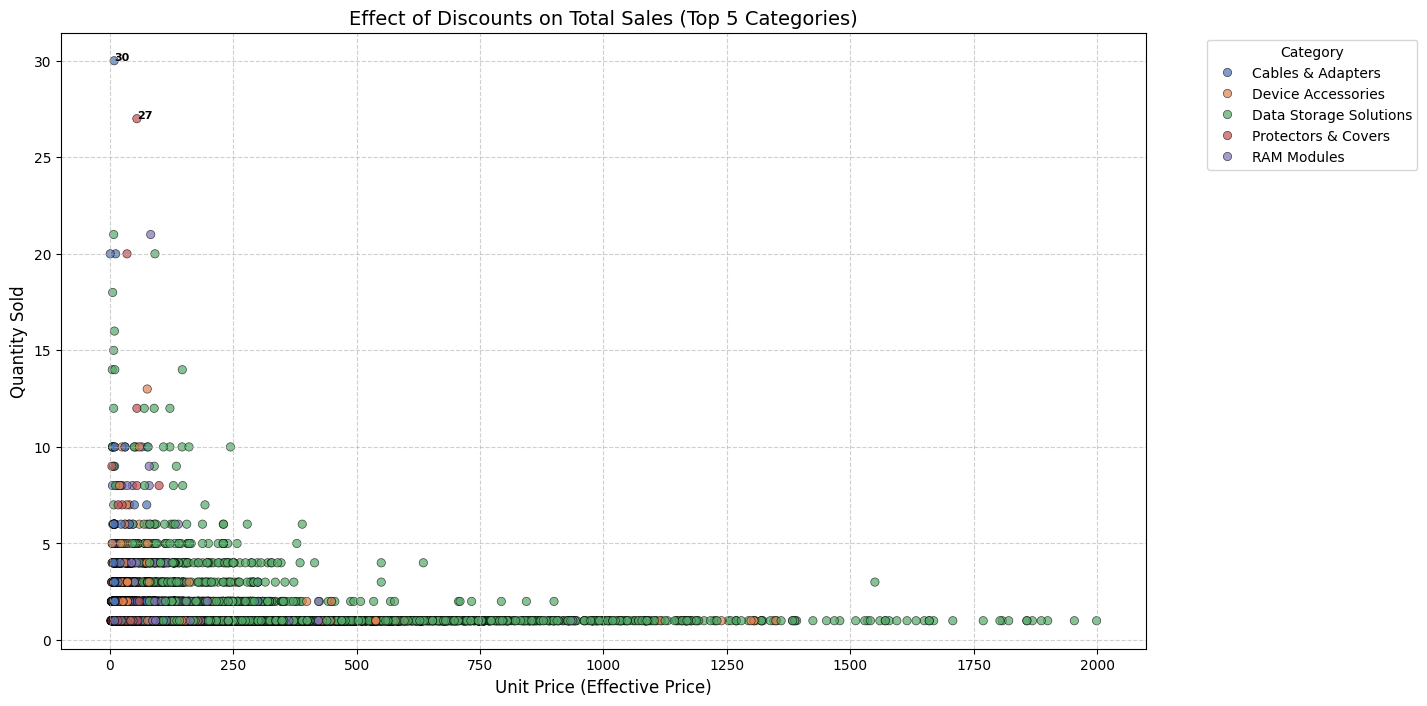

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers: unit price > 2000 and quantity > 30
filtered_df = filtered_df[(filtered_df['unit_price'] <= 2000) & (filtered_df['product_quantity'] <= 30)]

# Create the scatterplot
plt.figure(figsize=(14, 8))  # Make the graph wider
scatter = sns.scatterplot(
    data=filtered_df, x='unit_price', y='product_quantity',
    hue='category', palette='deep', alpha=0.7, edgecolor='black'
)

# Add labels to the points for better clarity
for line in range(0, filtered_df.shape[0]):
    if filtered_df['product_quantity'].iloc[line] > 25:  # Only label significant points
        scatter.text(
            filtered_df['unit_price'].iloc[line], filtered_df['product_quantity'].iloc[line],
            f"{filtered_df['product_quantity'].iloc[line]}",
            horizontalalignment='left', size=8, color='black', weight='semibold'
        )

# Labels and title
plt.title('Effect of Discounts on Total Sales (Top 5 Categories)', fontsize=14)
plt.xlabel('Unit Price (Effective Price)', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()


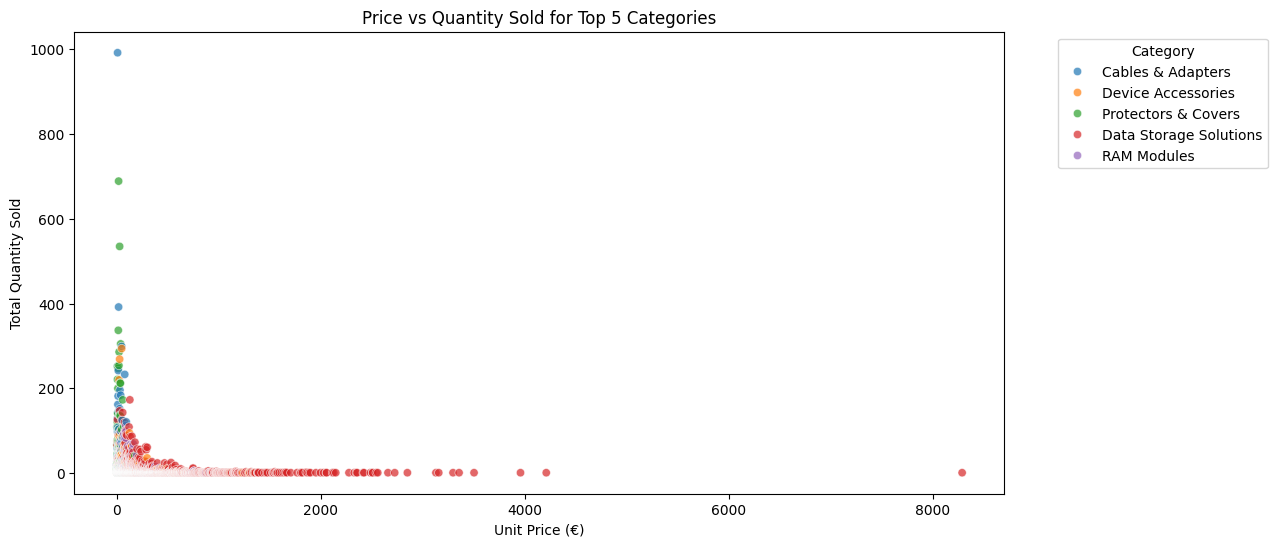

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter dataset to only include completed orders
completed_orders = dataset_df[dataset_df['state'] == 'Completed']

# Find the top 5 most sold categories
top_5_categories = completed_orders.groupby('category')['product_quantity'].sum().nlargest(5).index

# Filter dataset for only those top 5 categories
filtered_df = completed_orders[completed_orders['category'].isin(top_5_categories)]

# Group by unit price and category, summing product quantity
price_sensitivity = filtered_df.groupby(['unit_price', 'category']).agg({
    'product_quantity': 'sum'
}).reset_index()

# Plot the scatter plot
plt.figure(figsize=(12, 6))  # Wider figure for better visibility
sns.scatterplot(data=price_sensitivity, x='unit_price', y='product_quantity', hue='category', palette='tab10', alpha=0.7)

# Add labels and title
plt.title('Price vs Quantity Sold for Top 5 Categories')
plt.xlabel('Unit Price (€)')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

<ipython-input-20-cd47ca1bb851>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sweet_spot['10% Discount'] = sweet_spot['unit_price'] * 0.9
<ipython-input-20-cd47ca1bb851>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sweet_spot['20% Discount'] = sweet_spot['unit_price'] * 0.8
<ipython-input-20-cd47ca1bb851>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

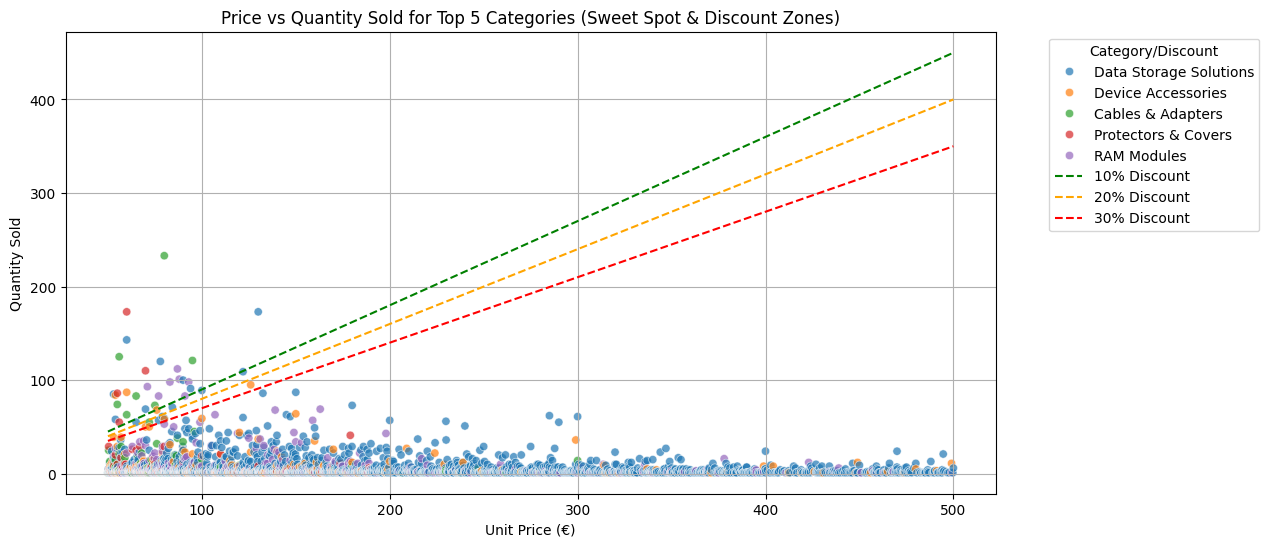

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the dataset to only include completed orders
completed_orders = dataset_df[dataset_df['state'] == 'Completed']

# Find the top 5 most sold categories
top_5_categories = completed_orders.groupby('category')['product_quantity'].sum().nlargest(5).index

# Filter dataset for only the top 5 categories
filtered_df = completed_orders[completed_orders['category'].isin(top_5_categories)]

# Group by unit price and category, summing product quantity
price_sensitivity = filtered_df.groupby(['unit_price', 'category']).agg({
    'product_quantity': 'sum'
}).reset_index()

# We can calculate a "sweet spot" for price and quantity by identifying the most common price ranges where quantity is high.
# Here, we’ll look at price ranges that have moderate sales

# Define the "sweet spot" range, which we will define as unit price between a certain range, say 50 to 500
sweet_spot = price_sensitivity[(price_sensitivity['unit_price'] >= 50) & (price_sensitivity['unit_price'] <= 500)]

# We can also add a calculated field to simulate discount percentage
# For simplicity, let's assume a 10%, 20%, and 30% discount for demonstration
sweet_spot['10% Discount'] = sweet_spot['unit_price'] * 0.9
sweet_spot['20% Discount'] = sweet_spot['unit_price'] * 0.8
sweet_spot['30% Discount'] = sweet_spot['unit_price'] * 0.7

# Plot the refined scatter plot with "sweet spot" for pricing
plt.figure(figsize=(12, 6))  # Wider figure for better visibility

# Plotting the scatter plot with price on x-axis and quantity sold on y-axis, color-coded by category
sns.scatterplot(data=sweet_spot, x='unit_price', y='product_quantity', hue='category', palette='tab10', alpha=0.7)

# Plot the discount potential areas (10%, 20%, 30%)
plt.plot(sweet_spot['unit_price'], sweet_spot['10% Discount'], color='green', label='10% Discount', linestyle='--')
plt.plot(sweet_spot['unit_price'], sweet_spot['20% Discount'], color='orange', label='20% Discount', linestyle='--')
plt.plot(sweet_spot['unit_price'], sweet_spot['30% Discount'], color='red', label='30% Discount', linestyle='--')

# Add labels and title
plt.title('Price vs Quantity Sold for Top 5 Categories (Sweet Spot & Discount Zones)')
plt.xlabel('Unit Price (€)')
plt.ylabel('Quantity Sold')
plt.legend(title='Category/Discount', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<ipython-input-21-637fbf372bdd>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sweet_spot['20% Discount Price'] = sweet_spot['unit_price'] * 0.8


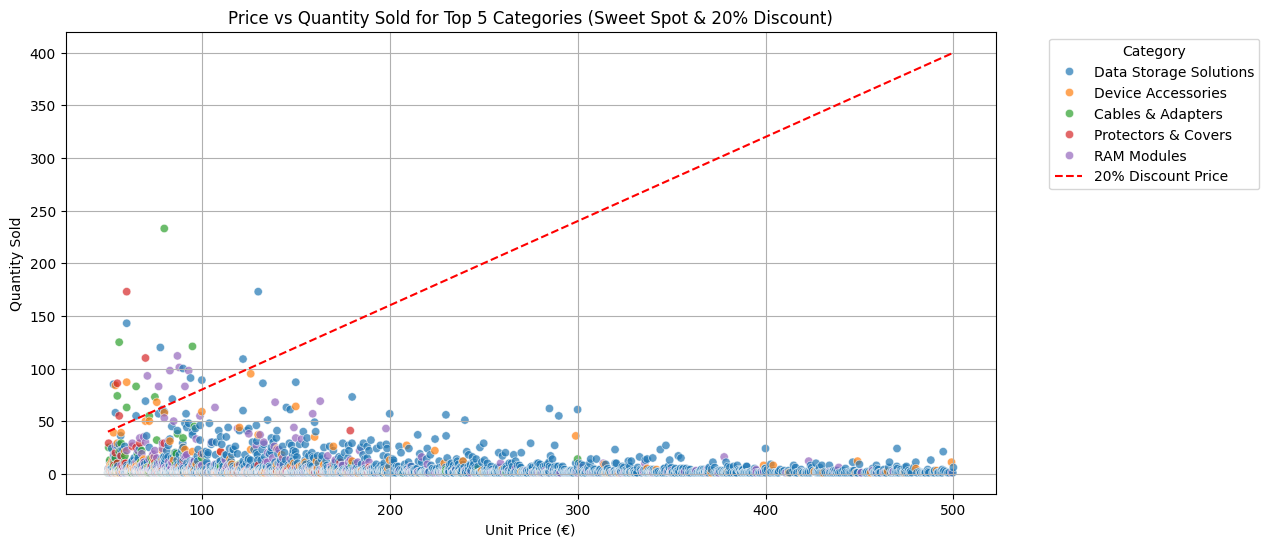

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'sweet_spot' dataframe already contains the necessary data

# Focus on the top 5 categories and filter data for those categories
top_5_categories = completed_orders.groupby('category')['product_quantity'].sum().nlargest(5).index
filtered_df = completed_orders[completed_orders['category'].isin(top_5_categories)]

# Group by price and calculate the total quantity sold
price_sensitivity = filtered_df.groupby(['unit_price', 'category']).agg({
    'product_quantity': 'sum'
}).reset_index()

# Define the "sweet spot" price range (simplified, for example between 50€ and 500€)
sweet_spot = price_sensitivity[(price_sensitivity['unit_price'] >= 50) & (price_sensitivity['unit_price'] <= 500)]

# Plot the simplified scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for price vs quantity sold, color-coded by category
sns.scatterplot(data=sweet_spot, x='unit_price', y='product_quantity', hue='category', palette='tab10', alpha=0.7)

# Highlight the "sweet spot" discount range with a single line (e.g., 20% discount)
sweet_spot['20% Discount Price'] = sweet_spot['unit_price'] * 0.8
plt.plot(sweet_spot['unit_price'], sweet_spot['20% Discount Price'], color='red', label='20% Discount Price', linestyle='--')

# Add labels and title
plt.title('Price vs Quantity Sold for Top 5 Categories (Sweet Spot & 20% Discount)')
plt.xlabel('Unit Price (€)')
plt.ylabel('Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<ipython-input-22-8b0cf549611e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sweet_spot['20% Discount Price'] = sweet_spot['unit_price'] * 0.8


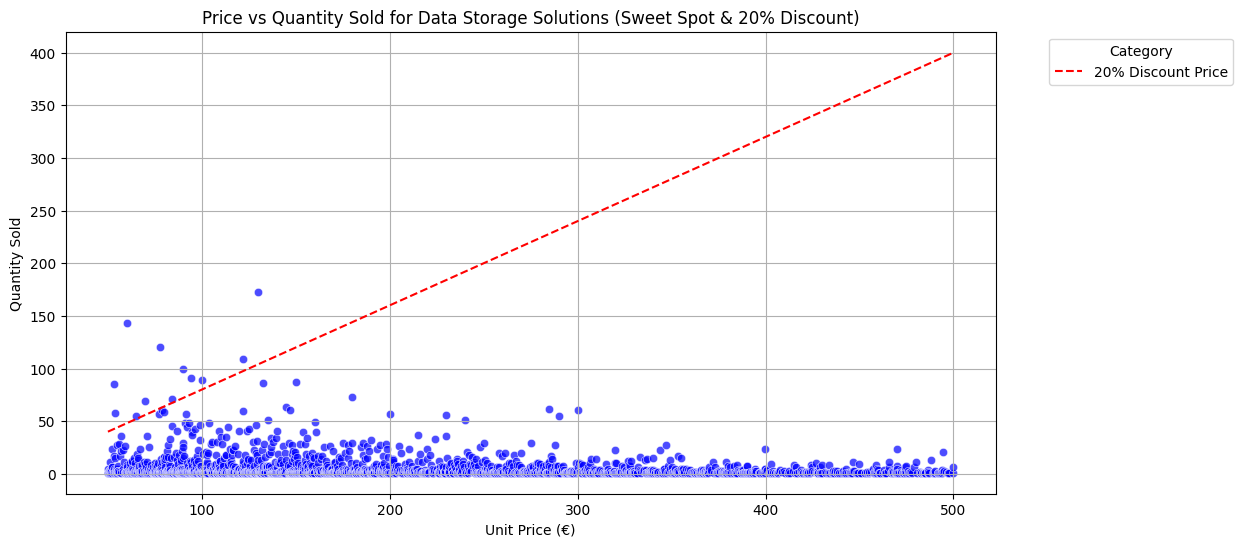

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the category to focus on (e.g., Data Storage Solutions)
category_to_focus = 'Data Storage Solutions'

# Filter the dataset for the selected category
filtered_df = completed_orders[completed_orders['category'] == category_to_focus]

# Group by price and calculate the total quantity sold for that category
price_sensitivity = filtered_df.groupby(['unit_price']).agg({
    'product_quantity': 'sum'
}).reset_index()

# Define the "sweet spot" price range (simplified, for example between 50€ and 500€)
sweet_spot = price_sensitivity[(price_sensitivity['unit_price'] >= 50) & (price_sensitivity['unit_price'] <= 500)]

# Plot the simplified scatter plot for the selected category
plt.figure(figsize=(12, 6))

# Scatter plot for price vs quantity sold for that category
sns.scatterplot(data=sweet_spot, x='unit_price', y='product_quantity', color='blue', alpha=0.7)

# Highlight the "sweet spot" discount range with a single line (e.g., 20% discount)
sweet_spot['20% Discount Price'] = sweet_spot['unit_price'] * 0.8
plt.plot(sweet_spot['unit_price'], sweet_spot['20% Discount Price'], color='red', label='20% Discount Price', linestyle='--')

# Add labels and title
plt.title(f'Price vs Quantity Sold for {category_to_focus} (Sweet Spot & 20% Discount)')
plt.xlabel('Unit Price (€)')
plt.ylabel('Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<ipython-input-23-34e38d525301>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accessories_df['revenue_no_discount'] = accessories_df['price'] * accessories_df['product_quantity']
<ipython-input-23-34e38d525301>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium_df['revenue_no_discount'] = premium_df['price'] * premium_df['product_quantity']
<ipython-input-23-34e38d525301>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

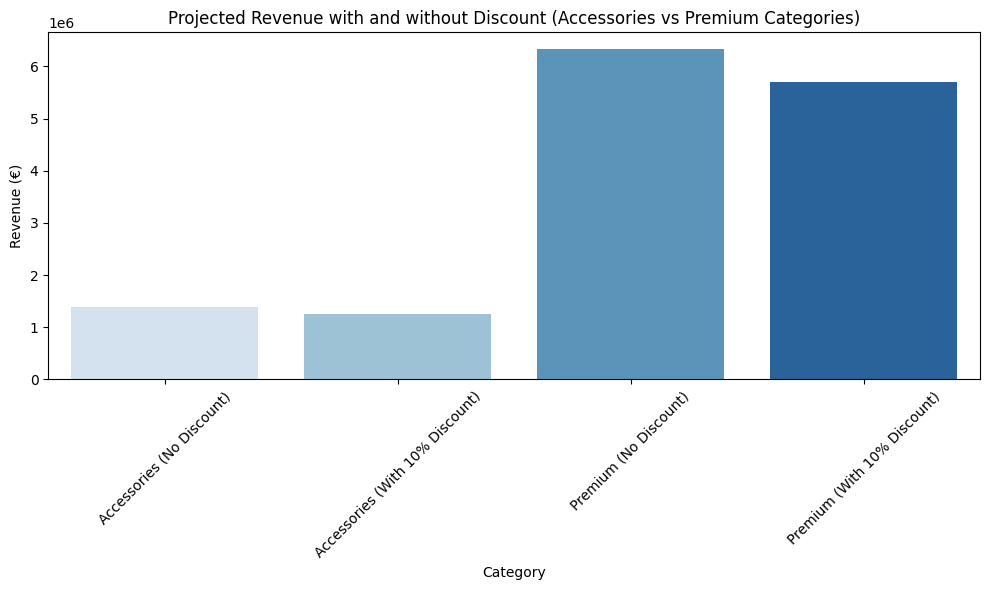

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Categories representing Accessories
accessory_categories = ['Cables & Chargers', 'Headphones', 'Mouse & Trackpads', 'Keyboards & Keypads', 'Monitors & Displays']

# Categories representing Premium items
premium_categories = ['Data Storage Solutions', 'MacBooks', 'iMacs', 'iPhones', 'iPads']

# Filter data into Accessories and Premium categories
accessories_df = dataset_df[dataset_df['category'].isin(accessory_categories)]
premium_df = dataset_df[dataset_df['category'].isin(premium_categories)]

# Projected Revenue without discount
accessories_df['revenue_no_discount'] = accessories_df['price'] * accessories_df['product_quantity']
premium_df['revenue_no_discount'] = premium_df['price'] * premium_df['product_quantity']

# Projected Revenue with a discount (e.g., 10%)
discount_percentage = 0.10
accessories_df['revenue_with_discount'] = accessories_df['revenue_no_discount'] * (1 - discount_percentage)
premium_df['revenue_with_discount'] = premium_df['revenue_no_discount'] * (1 - discount_percentage)

# Calculate total revenue by category with and without discount
total_revenue_accessories_no_discount = accessories_df['revenue_no_discount'].sum()
total_revenue_accessories_with_discount = accessories_df['revenue_with_discount'].sum()
total_revenue_premium_no_discount = premium_df['revenue_no_discount'].sum()
total_revenue_premium_with_discount = premium_df['revenue_with_discount'].sum()

# Create a summary for plotting
summary_df = pd.DataFrame({
    'Category': ['Accessories (No Discount)', 'Accessories (With 10% Discount)',
                 'Premium (No Discount)', 'Premium (With 10% Discount)'],
    'Revenue': [total_revenue_accessories_no_discount, total_revenue_accessories_with_discount,
                total_revenue_premium_no_discount, total_revenue_premium_with_discount]
})

# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='Category', y='Revenue', palette='Blues')

# Add labels and title
plt.title('Projected Revenue with and without Discount (Accessories vs Premium Categories)')
plt.xlabel('Category')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-24-6f912f1a7a62>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accessories_df['revenue_no_discount'] = accessories_df['price'] * accessories_df['product_quantity']
<ipython-input-24-6f912f1a7a62>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium_df['revenue_no_discount'] = premium_df['price'] * premium_df['product_quantity']
<ipython-input-24-6f912f1a7a62>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

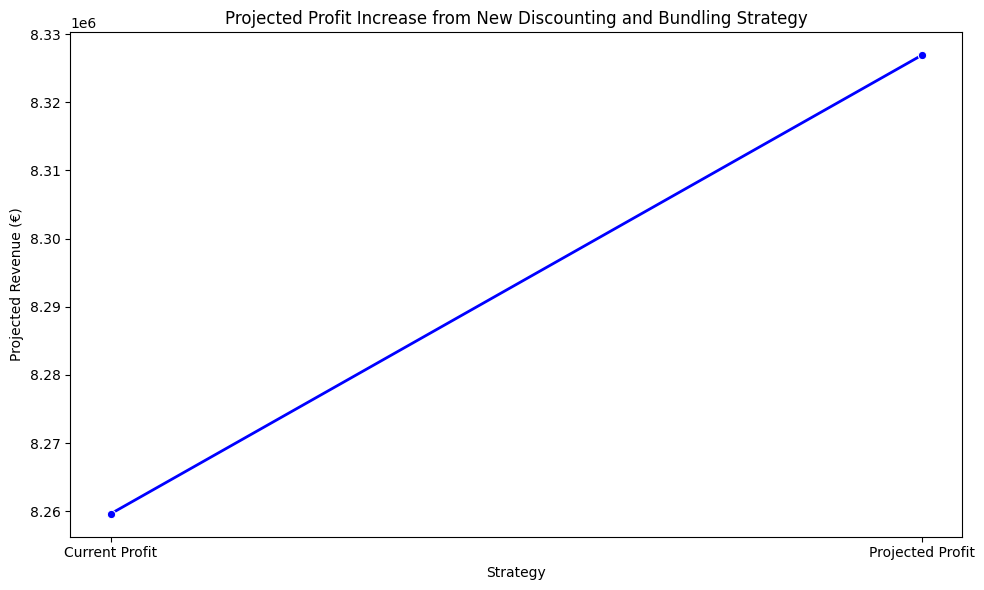

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset_df has 'category', 'price', 'product_quantity', 'unit_price' columns.

# Define categories for accessories and premium items
accessory_categories = ['Cables & Chargers', 'Headphones', 'Mouse & Trackpads', 'Keyboards & Keypads', 'Monitors & Displays','Device Accessories','Network']
premium_categories = ['Data Storage Solutions', 'MacBooks & iMacs', 'iPhones', 'iPads']

# Filter data into accessories and premium categories
accessories_df = dataset_df[dataset_df['category'].isin(accessory_categories)]
premium_df = dataset_df[dataset_df['category'].isin(premium_categories)]

# Calculate current revenue (no discount)
accessories_df['revenue_no_discount'] = accessories_df['price'] * accessories_df['product_quantity']
premium_df['revenue_no_discount'] = premium_df['price'] * premium_df['product_quantity']

# Apply moderate discount (e.g., 10% discount) to accessory categories
discount_percentage = 0.10
accessories_df['revenue_with_discount'] = accessories_df['revenue_no_discount'] * (1 - discount_percentage)

# Project an increase in sales for accessories when bundled with premium products
# Assume a 15% increase in accessory sales due to bundling
accessories_df['revenue_with_discount_and_bundling'] = accessories_df['revenue_with_discount'] * 1.15

# Calculate the total current and projected revenue (before and after discount/bundling)
current_revenue_accessories = accessories_df['revenue_no_discount'].sum()
projected_revenue_accessories = accessories_df['revenue_with_discount_and_bundling'].sum()

current_revenue_premium = premium_df['revenue_no_discount'].sum()
projected_revenue_premium = premium_df['revenue_no_discount'].sum()  # No change in premium products (no discount)

# Total current and projected revenue
total_current_revenue = current_revenue_accessories + current_revenue_premium
total_projected_revenue = projected_revenue_accessories + projected_revenue_premium

# Data for plotting: we create a dataframe for the line graph
revenue_data = {
    'Strategy': ['Current Profit', 'Projected Profit'],
    'Revenue (€)': [total_current_revenue, total_projected_revenue]
}
revenue_df = pd.DataFrame(revenue_data)

# Plot the line graph showing the current and projected profits
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_df, x='Strategy', y='Revenue (€)', marker='o', color='blue', linewidth=2)

# Add labels and title
plt.title('Projected Profit Increase from New Discounting and Bundling Strategy')
plt.xlabel('Strategy')
plt.ylabel('Projected Revenue (€)')
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-26-54a45d881ac1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_value_df['current_revenue'] = lower_value_df['price'] * lower_value_df['product_quantity']
<ipython-input-26-54a45d881ac1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_value_df['revenue_with_discount'] = lower_value_df['current_revenue'] * (1 - discount_percentage)
<ipython-input-26-54a45d881ac1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

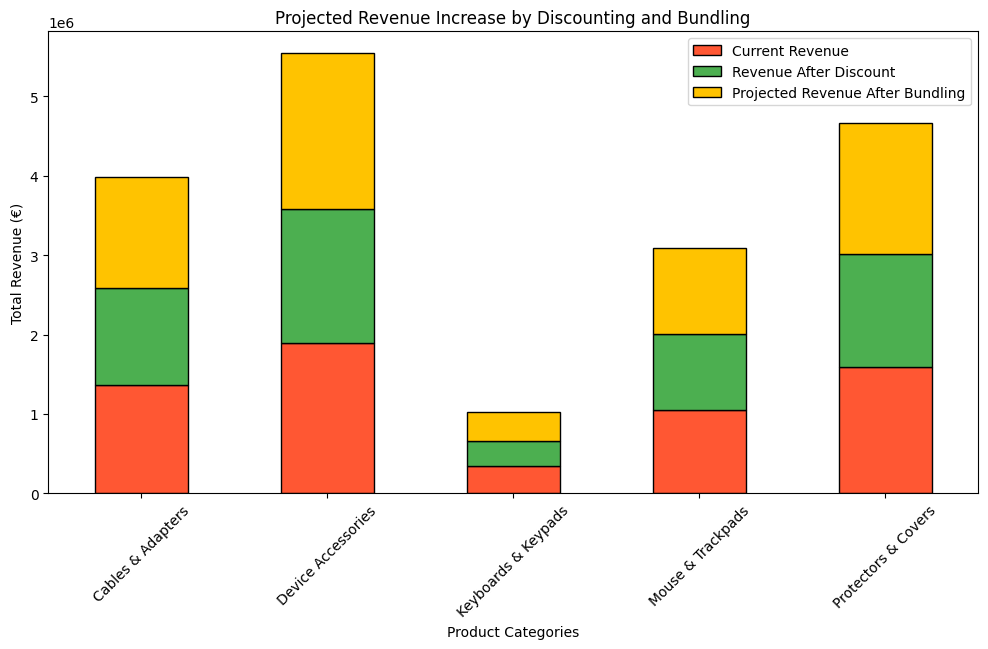

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Apply discount only to accessories categories and simulate bundling
discount_percentage = 0.1  # 10% discount

# Filter lower-value categories (e.g., accessories, cables, peripherals)
lower_value_categories = ['Cables & Adapters', 'Protectors & Covers', 'Device Accessories', 'Mouse & Trackpads', 'Keyboards & Keypads']

# Filter dataset for lower-value categories
lower_value_df = dataset_df[dataset_df['category'].isin(lower_value_categories)]

# Calculate current revenue for lower-value categories
lower_value_df['current_revenue'] = lower_value_df['price'] * lower_value_df['product_quantity']

# Apply 10% discount to lower-value categories
lower_value_df['revenue_with_discount'] = lower_value_df['current_revenue'] * (1 - discount_percentage)

# Project an increase in sales when bundling with higher-value items (assumed increase of 15%)
lower_value_df['projected_revenue'] = lower_value_df['revenue_with_discount'] * 1.15

# Aggregate revenue data by category
category_projection = lower_value_df.groupby('category').agg(
    current_revenue=('current_revenue', 'sum'),
    revenue_with_discount=('revenue_with_discount', 'sum'),
    projected_revenue=('projected_revenue', 'sum')
).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar charts for current revenue, revenue with discount, and projected revenue
category_projection.set_index('category')[['current_revenue', 'revenue_with_discount', 'projected_revenue']].plot(
    kind='bar', stacked=True, ax=ax, color=['#FF5733', '#4CAF50', '#FFC300'], edgecolor='black'
)

# Labels and Title
plt.ylabel('Total Revenue (€)')
plt.xlabel('Product Categories')
plt.title('Projected Revenue Increase by Discounting and Bundling')
plt.xticks(rotation=45)
plt.legend(['Current Revenue', 'Revenue After Discount', 'Projected Revenue After Bundling'])

# Display the plot
plt.show()

<ipython-input-29-26adee636ea5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']
<ipython-input-29-26adee636ea5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['current_revenue'] = dataset_df['price'] * dataset_df['product_quantity']
<ipython-input-29-26adee636ea5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

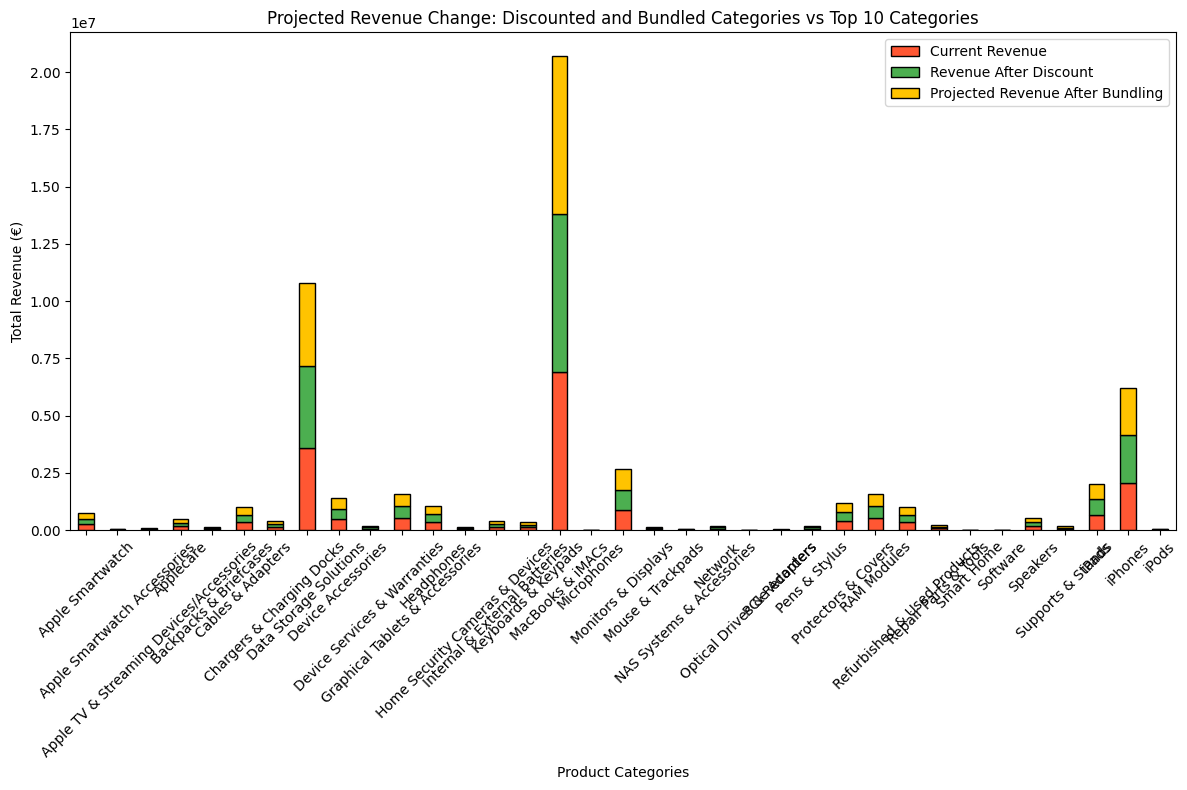

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'discount' column is calculated
dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']

# Get top 10 revenue-generating categories
top_10_categories = dataset_df.groupby('category')['revenue'].sum().nlargest(10).index

# Calculate current revenue for all categories
dataset_df['current_revenue'] = dataset_df['price'] * dataset_df['product_quantity']

# Apply discounts to non-top-10 categories and project bundling for them
discount_percentage = 0.1  # 10% discount
bundling_increase = 1.15  # 15% increase due to bundling

# Create a new DataFrame for simulation
dataset_df['revenue_with_discount'] = dataset_df['current_revenue']
dataset_df['projected_revenue'] = dataset_df['current_revenue']

# Apply discount and bundling to non-top-10 categories
dataset_df.loc[~dataset_df['category'].isin(top_10_categories), 'revenue_with_discount'] = \
    dataset_df['current_revenue'] * (1 - discount_percentage)
dataset_df.loc[~dataset_df['category'].isin(top_10_categories), 'projected_revenue'] = \
    dataset_df['revenue_with_discount'] * bundling_increase

# Aggregate revenue data by category
category_projection = dataset_df.groupby('category').agg(
    current_revenue=('current_revenue', 'sum'),
    revenue_with_discount=('revenue_with_discount', 'sum'),
    projected_revenue=('projected_revenue', 'sum')
).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot stacked bar chart
category_projection.set_index('category')[['current_revenue', 'revenue_with_discount', 'projected_revenue']].plot(
    kind='bar', stacked=True, ax=ax, color=['#FF5733', '#4CAF50', '#FFC300'], edgecolor='black'
)

# Labels and Title
plt.ylabel('Total Revenue (€)')
plt.xlabel('Product Categories')
plt.title('Projected Revenue Change: Discounted and Bundled Categories vs Top 10 Categories')
plt.xticks(rotation=45)
plt.legend(['Current Revenue', 'Revenue After Discount', 'Projected Revenue After Bundling'])

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-30-dc7906b9935c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']
<ipython-input-30-dc7906b9935c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_categories_data['lost_revenue'] = top_10_categories_data['discount'] * top_10_categories_data['product_quantity']
<ipython-input-30-dc7906b9935c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

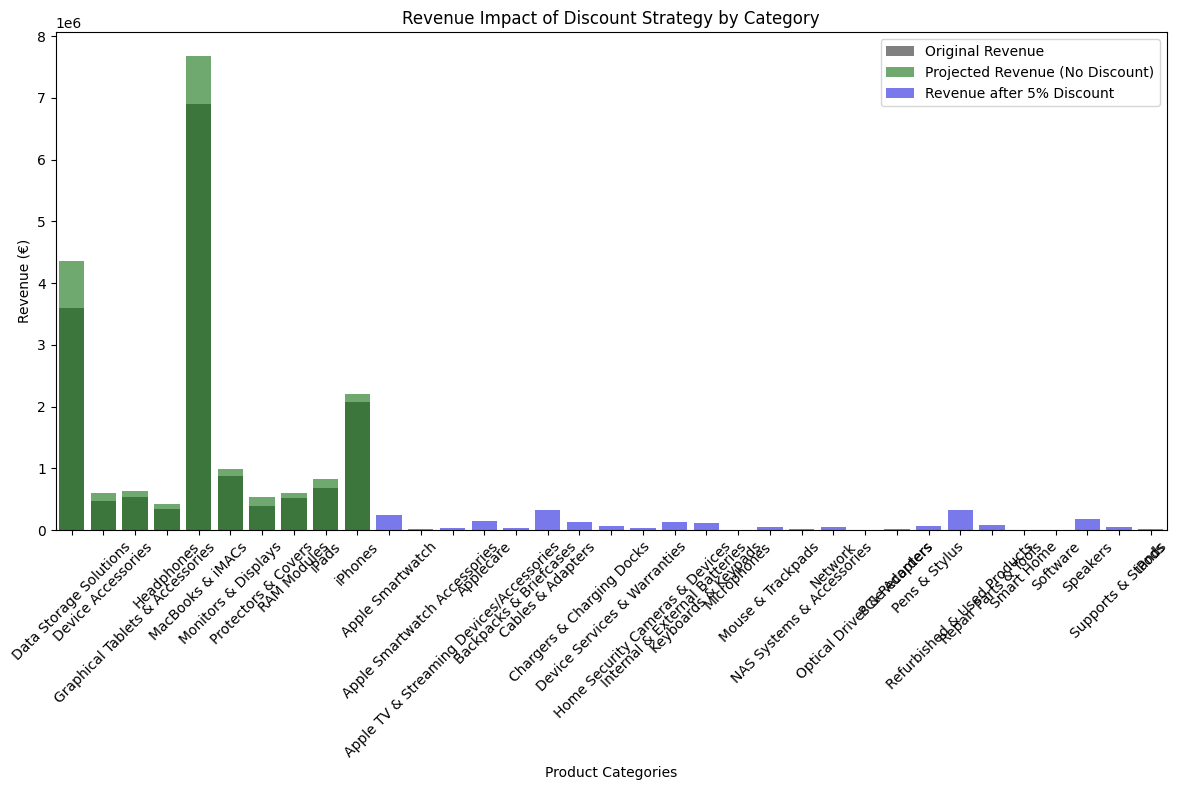

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming dataset_df is the dataframe

# 1. Identify the top 10 revenue-generating categories
top_10_categories = dataset_df.groupby('category')['revenue'].sum().nlargest(10).index

# 2. Calculate the revenue lost due to discounts
dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']
top_10_categories_data = dataset_df[dataset_df['category'].isin(top_10_categories)]

# Calculate the total revenue lost by discounting in the top 10 categories
top_10_categories_data['lost_revenue'] = top_10_categories_data['discount'] * top_10_categories_data['product_quantity']

# 3. Simulate the new revenue without discounts for the top 10 categories
top_10_categories_data['new_revenue_no_discount'] = top_10_categories_data['revenue'] + top_10_categories_data['lost_revenue']

# 4. Calculate the 5% discount on all other categories
other_categories_data = dataset_df[~dataset_df['category'].isin(top_10_categories)]
other_categories_data['revenue_after_discount'] = other_categories_data['revenue'] * 0.95  # Apply 5% discount

# 5. Prepare the data for plotting
top_10_categories_revenue = top_10_categories_data.groupby('category').agg(
    original_revenue=('revenue', 'sum'),
    new_revenue_no_discount=('new_revenue_no_discount', 'sum')
).reset_index()

other_categories_revenue = other_categories_data.groupby('category').agg(
    revenue_after_discount=('revenue_after_discount', 'sum')
).reset_index()

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot for top 10 categories
sns.barplot(data=top_10_categories_revenue, x='category', y='original_revenue', color='gray', label='Original Revenue')
sns.barplot(data=top_10_categories_revenue, x='category', y='new_revenue_no_discount', color='green', alpha=0.6, label='Projected Revenue (No Discount)')

# Plot for all other categories (after applying 5% discount)
sns.barplot(data=other_categories_revenue, x='category', y='revenue_after_discount', color='blue', alpha=0.6, label='Revenue after 5% Discount')

# Labels and Title
plt.title('Revenue Impact of Discount Strategy by Category')
plt.xlabel('Product Categories')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-34-c31d5d67be29>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']
<ipython-input-34-c31d5d67be29>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_top_10_categories_data['lost_revenue'] = non_top_10_categories_data['discount'] * non_top_10_categories_data['product_quantity']
<ipython-input-34-c31d5d67be29>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

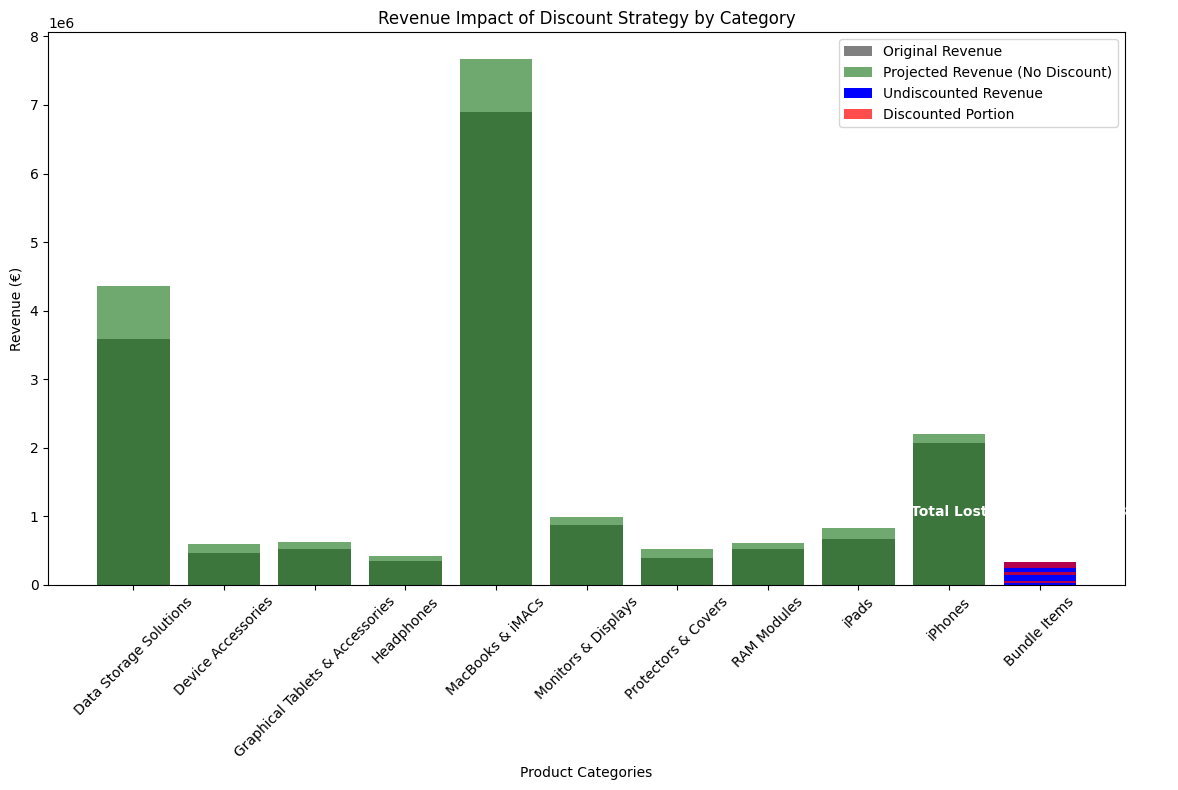

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'discount' column is calculated correctly
dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']

# 1. Identify the top 10 revenue-generating categories
top_10_categories = dataset_df.groupby('category')['revenue'].sum().nlargest(10).index

# 2. Calculate the revenue lost due to discounts for the non-top 10 categories
non_top_10_categories_data = dataset_df[~dataset_df['category'].isin(top_10_categories)]

# Calculate the total revenue lost by discounting in the non-top 10 categories
non_top_10_categories_data['lost_revenue'] = non_top_10_categories_data['discount'] * non_top_10_categories_data['product_quantity']

# Aggregate the revenue for the non-top 10 categories
non_top_10_categories_agg = non_top_10_categories_data.groupby('category').agg(
    total_revenue=('revenue', 'sum'),
    total_lost_revenue=('lost_revenue', 'sum')
).reset_index()

# Calculate the new revenue after the 5% discount for the non-top 10 categories
non_top_10_categories_data['revenue_after_discount'] = non_top_10_categories_data['revenue'] * 0.95

# Aggregate the revenue after discount for the non-top 10 categories
non_top_10_total_revenue_after_discount = non_top_10_categories_data['revenue_after_discount'].sum()

# 3. Calculate lost revenue for the top 10 categories
top_10_categories_data = dataset_df[dataset_df['category'].isin(top_10_categories)]
top_10_categories_data['lost_revenue'] = top_10_categories_data['discount'] * top_10_categories_data['product_quantity']

# Aggregate the revenue for top 10 categories
top_10_categories_revenue = top_10_categories_data.groupby('category').agg(
    original_revenue=('revenue', 'sum'),
    total_lost_revenue=('lost_revenue', 'sum')
).reset_index()

# Projected revenue without discounts for top 10 categories (add back the lost revenue due to discounts)
top_10_categories_revenue['projected_revenue'] = top_10_categories_revenue['original_revenue'] + top_10_categories_revenue['total_lost_revenue']

# Plotting
plt.figure(figsize=(12, 8))

# Plot for top 10 categories (show original and projected revenue)
sns.barplot(data=top_10_categories_revenue, x='category', y='original_revenue', color='gray', label='Original Revenue')
sns.barplot(data=top_10_categories_revenue, x='category', y='projected_revenue', color='green', alpha=0.6, label='Projected Revenue (No Discount)')

# Plot for non-top 10 categories as one aggregated bar (Bundle Items)
for idx, row in non_top_10_categories_agg.iterrows():
    plt.bar("Bundle Items", row['total_revenue'], color='blue', label='Undiscounted Revenue' if idx == 0 else "")
    plt.bar("Bundle Items", row['total_lost_revenue'], bottom=row['total_revenue'] - row['total_lost_revenue'],
            color='red', alpha=0.7, label='Discounted Portion' if idx == 0 else "")

# Add a label for the total lost revenue in the 'Bundle Items' bar
plt.text("Bundle Items", non_top_10_total_revenue_after_discount / 2,
         f"Total Lost Revenue: €{non_top_10_categories_agg['total_lost_revenue'].sum():,.2f}",
         ha='center', va='center', color='white', fontweight='bold')

# Labels and Title
plt.title('Revenue Impact of Discount Strategy by Category')
plt.xlabel('Product Categories')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-35-29862387cf82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']
<ipython-input-35-29862387cf82>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_top_10_categories_data['lost_revenue'] = non_top_10_categories_data['discount'] * non_top_10_categories_data['product_quantity']
<ipython-input-35-29862387cf82>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

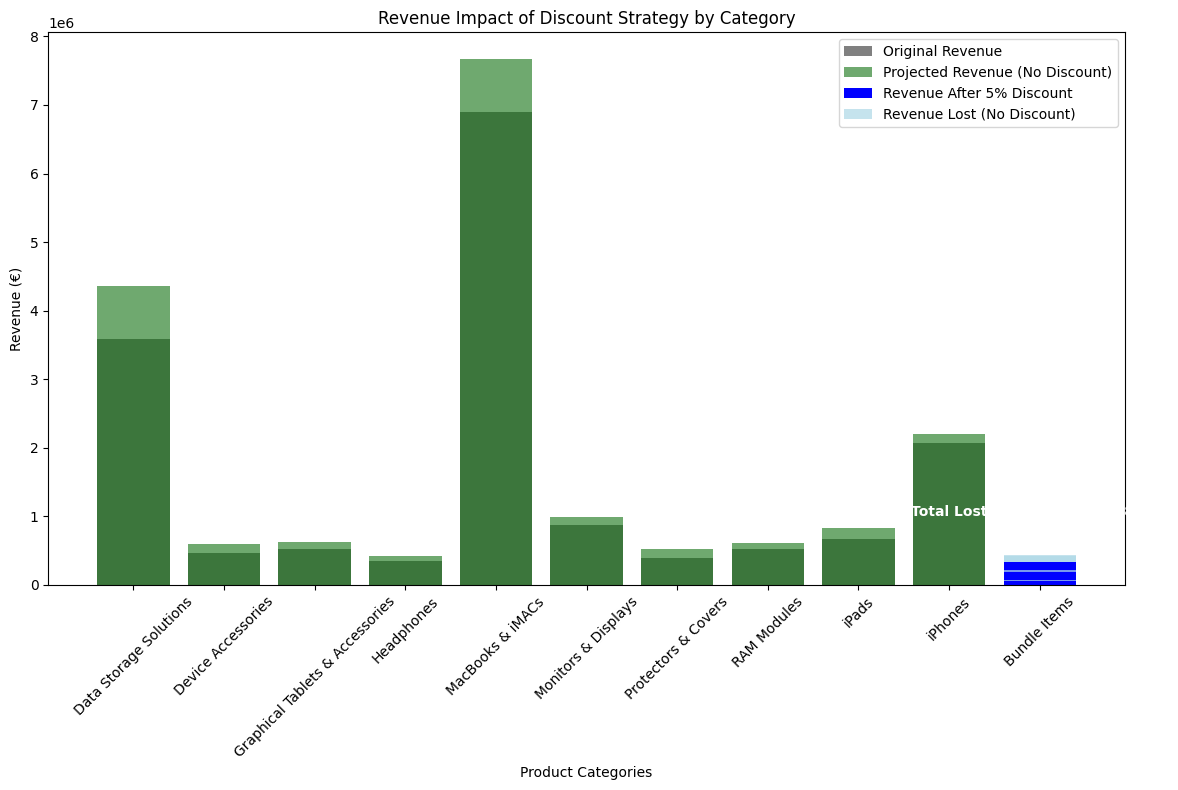

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'discount' column is calculated correctly
dataset_df['discount'] = dataset_df['price'] - dataset_df['unit_price']

# 1. Identify the top 10 revenue-generating categories
top_10_categories = dataset_df.groupby('category')['revenue'].sum().nlargest(10).index

# 2. Calculate the revenue lost due to discounts for the non-top 10 categories
non_top_10_categories_data = dataset_df[~dataset_df['category'].isin(top_10_categories)]

# Calculate the total revenue lost by discounting in the non-top 10 categories
non_top_10_categories_data['lost_revenue'] = non_top_10_categories_data['discount'] * non_top_10_categories_data['product_quantity']

# Aggregate the revenue for the non-top 10 categories
non_top_10_categories_agg = non_top_10_categories_data.groupby('category').agg(
    total_revenue=('revenue', 'sum'),
    total_lost_revenue=('lost_revenue', 'sum')
).reset_index()

# Calculate the new revenue after the 5% discount for the non-top 10 categories
non_top_10_categories_data['revenue_after_discount'] = non_top_10_categories_data['revenue'] * 0.95

# Aggregate the revenue after discount for the non-top 10 categories
non_top_10_total_revenue_after_discount = non_top_10_categories_data['revenue_after_discount'].sum()

# 3. Calculate lost revenue for the top 10 categories
top_10_categories_data = dataset_df[dataset_df['category'].isin(top_10_categories)]
top_10_categories_data['lost_revenue'] = top_10_categories_data['discount'] * top_10_categories_data['product_quantity']

# Aggregate the revenue for top 10 categories
top_10_categories_revenue = top_10_categories_data.groupby('category').agg(
    original_revenue=('revenue', 'sum'),
    total_lost_revenue=('lost_revenue', 'sum')
).reset_index()

# Projected revenue without discounts for top 10 categories (add back the lost revenue due to discounts)
top_10_categories_revenue['projected_revenue'] = top_10_categories_revenue['original_revenue'] + top_10_categories_revenue['total_lost_revenue']

# Plotting
plt.figure(figsize=(12, 8))

# Plot for top 10 categories (show original and projected revenue)
sns.barplot(data=top_10_categories_revenue, x='category', y='original_revenue', color='gray', label='Original Revenue')
sns.barplot(data=top_10_categories_revenue, x='category', y='projected_revenue', color='green', alpha=0.6, label='Projected Revenue (No Discount)')

# Plot for non-top 10 categories as one aggregated bar (Bundle Items)
# Blue bar shows revenue after discount, light blue on top shows the lost revenue (added back)
for idx, row in non_top_10_categories_agg.iterrows():
    plt.bar("Bundle Items", row['total_revenue'], color='blue', label='Revenue After 5% Discount' if idx == 0 else "")
    plt.bar("Bundle Items", row['total_lost_revenue'], bottom=row['total_revenue'],
            color='lightblue', alpha=0.7, label='Revenue Lost (No Discount)' if idx == 0 else "")

# Add a label for the total lost revenue in the 'Bundle Items' bar
plt.text("Bundle Items", non_top_10_total_revenue_after_discount / 2,
         f"Total Lost Revenue: €{non_top_10_categories_agg['total_lost_revenue'].sum():,.2f}",
         ha='center', va='center', color='white', fontweight='bold')

# Labels and Title
plt.title('Revenue Impact of Discount Strategy by Category')
plt.xlabel('Product Categories')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()